### Student Information
Name: 謝芝瑜

Student ID: 111065503

GitHub ID: Judy-Hsieh

---

### Instructions

1. First: do the **take home** exercises in the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/keziatamus/DM2022-Lab1-Homework/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 20th 11:59 pm, Thursday)__. 

In [270]:
### Begin Assignment Here

# First:
(at **DM2022-Lab1-Master** repo)

# Second:
below

## 2. Data Preparation
This dataset was created for the Paper 'From Group to Individual Labels using Deep Features', Kotzias et. al,. KDD 2015
Please cite the paper if you want to use it :)

It contains sentences labelled with positive or negative sentiment.

=======Format:=======
sentence score



=======Details:=======
Score is either 1 (for positive) or 0 (for negative)
The sentences come from three different websites/fields:

imdb.com
amazon.com
yelp.com

For each website, there exist 500 positive and 500 negative sentences. Those were selected randomly for larger datasets of reviews.
We attempted to select sentences that have a clearly positive or negative connotaton, the goal was for no neutral sentences to be selected.

In [271]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [272]:
# read file save into list type
with open('./sentiment labelled sentences/amazon_cells_labelled.txt', encoding="utf-8") as f:
    data_set_1 =[line for line in f.readlines()]
with open('./sentiment labelled sentences/imdb_labelled.txt', encoding="utf-8") as f2:
    data_set_2 =[line for line in f2.readlines()]
with open('./sentiment labelled sentences/yelp_labelled.txt', encoding="utf-8") as f3:
    data_set_3 =[line for line in f3.readlines()]

In [273]:
data_set_1[0:2]

['So there is no way for me to plug it in here in the US unless I go by a converter.\t0\n',
 'Good case, Excellent value.\t1\n']

In [274]:
# check lenght
len(data_set_1)

1000

In [275]:
len(data_set_2)

1000

In [276]:
len(data_set_3)

1000

In [277]:
data_set_1[:10]

['So there is no way for me to plug it in here in the US unless I go by a converter.\t0\n',
 'Good case, Excellent value.\t1\n',
 'Great for the jawbone.\t1\n',
 'Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!\t0\n',
 'The mic is great.\t1\n',
 'I have to jiggle the plug to get it to line up right to get decent volume.\t0\n',
 'If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.\t0\n',
 'If you are Razr owner...you must have this!\t1\n',
 'Needless to say, I wasted my money.\t0\n',
 'What a waste of money and time!.\t0\n']

## 3. Data Transformation
### 3.1 Converting Dictionary into Pandas Dataframe

In [278]:
import pandas as pd
import helpers.data_mining_helpers as dmh
# strip 特殊字元 \n and \t 
sentence1, score1 = dmh.format_rows(data_set_1)
sentence2, score2 = dmh.format_rows(data_set_2)
sentence3, score3 = dmh.format_rows(data_set_3)
# 將 list 轉成 dataframe
df1 = pd.DataFrame({'sentence':sentence1})
df1['score'] = score1
df2 = pd.DataFrame({'sentence':sentence2})
df2['score'] = score2
df3 = pd.DataFrame({'sentence':sentence3})
df3['score'] = score3

#### Adding Columns

In [279]:
# 新增一個 column，儲存資料來自哪一個網站
df1['website'] = 'amazon'
df2['website'] = 'imdb'
df3['website'] = 'yelp'

In [280]:
print(df1.shape)
print(df2.shape)
print(df3.shape)

(1000, 3)
(1000, 3)
(1000, 3)


In [281]:
df1

,sentence,score,website
0,So there is no way for me to plug it in here i...,0,amazon
1,"Good case, Excellent value.",1,amazon
2,Great for the jawbone.,1,amazon
3,Tied to charger for conversations lasting more...,0,amazon
4,The mic is great.,1,amazon
...,...,...,...
995,The screen does get smudged easily because it ...,0,amazon
996,What a piece of junk.. I lose more calls on th...,0,amazon
997,Item Does Not Match Picture.,0,amazon
998,The only thing that disappoint me is the infra...,0,amazon


In [282]:
# 將 dataframe 合併起來
df = pd.concat([df1, df2, df3], ignore_index=True)
df

,sentence,score,website
0,So there is no way for me to plug it in here i...,0,amazon
1,"Good case, Excellent value.",1,amazon
2,Great for the jawbone.,1,amazon
3,Tied to charger for conversations lasting more...,0,amazon
4,The mic is great.,1,amazon
...,...,...,...
2995,I think food should have flavor and texture an...,0,yelp
2996,Appetite instantly gone.,0,yelp
2997,Overall I was not impressed and would not go b...,0,yelp
2998,"The whole experience was underwhelming, and I ...",0,yelp


In [283]:
df.sentence[0]

'So there is no way for me to plug it in here in the US unless I go by a converter.'

### 3.2 Familiarizing yourself with the Data

In [284]:
df[:10][["sentence","score"]]

,sentence,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
5,I have to jiggle the plug to get it to line up...,0
6,If you have several dozen or several hundred c...,0
7,If you are Razr owner...you must have this!,1
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0


In [285]:
# get last 10 data
df[-10:]

,sentence,score,website
2990,The refried beans that came with my meal were ...,0,yelp
2991,Spend your money and time some place else.,0,yelp
2992,A lady at the table next to us found a live gr...,0,yelp
2993,the presentation of the food was awful.,0,yelp
2994,I can't tell you how disappointed I was.,0,yelp
2995,I think food should have flavor and texture an...,0,yelp
2996,Appetite instantly gone.,0,yelp
2997,Overall I was not impressed and would not go b...,0,yelp
2998,"The whole experience was underwhelming, and I ...",0,yelp
2999,"Then, as if I hadn't wasted enough of my life ...",0,yelp


In [286]:
# using loc (by label)
# retrieve first 10 rows of clo = 'sentence'
df.loc[:10, 'sentence']

0     So there is no way for me to plug it in here i...
1                           Good case, Excellent value.
2                                Great for the jawbone.
3     Tied to charger for conversations lasting more...
4                                     The mic is great.
5     I have to jiggle the plug to get it to line up...
6     If you have several dozen or several hundred c...
7           If you are Razr owner...you must have this!
8                   Needless to say, I wasted my money.
9                      What a waste of money and time!.
10                      And the sound quality is great.
Name: sentence, dtype: object

In [287]:
# using iloc (by position)
# 'sentence' column is in array[0]
df.iloc[:10, 0]

0    So there is no way for me to plug it in here i...
1                          Good case, Excellent value.
2                               Great for the jawbone.
3    Tied to charger for conversations lasting more...
4                                    The mic is great.
5    I have to jiggle the plug to get it to line up...
6    If you have several dozen or several hundred c...
7          If you are Razr owner...you must have this!
8                  Needless to say, I wasted my money.
9                     What a waste of money and time!.
Name: sentence, dtype: object

In [288]:
# 取得來自 amazon 網站的資料
# 每10筆取一個. 僅顯示前五筆
df[df['website'] == 'amazon'].iloc[::10][0:5]

,sentence,score,website
0,So there is no way for me to plug it in here i...,0,amazon
10,And the sound quality is great.,1,amazon
20,I went on Motorola's website and followed all ...,0,amazon
30,"This is a simple little phone to use, but the ...",0,amazon
40,"It has a great camera thats 2MP, and the pics ...",1,amazon


## 4. Data Mining using Pandas
### 4.1 Missing Values

In [289]:
# check missing values
df.isnull()

,sentence,score,website
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
2995,False,False,False
2996,False,False,False
2997,False,False,False
2998,False,False,False


In [290]:
# 使用 dmh 中的函式，以 col 為單位，計算 null值 總數量
df.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score,website
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [291]:
# 以 row 為單位，計算 null值 總數量
df.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2995    (The amoung of missing records is: , 0)
2996    (The amoung of missing records is: , 0)
2997    (The amoung of missing records is: , 0)
2998    (The amoung of missing records is: , 0)
2999    (The amoung of missing records is: , 0)
Length: 3000, dtype: object

In [292]:
# 產生一個假資料，缺少了 'company' 這一個 attribute值
dummy_series = pd.Series(["This is a dummy_record of comments", 1], index=["sentence", "score"])

In [293]:
dummy_series

sentence    This is a dummy_record of comments
score                                        1
dtype: object

In [294]:
# 轉換成 dataframe
# .to_frame() -> Convert Series to DataFrame
# .T          -> Transpose
dummy_series.to_frame().T

,sentence,score
0,This is a dummy_record of comments,1


In [295]:
# 把假資料，加到我們的 df 中(加在最後一筆)
df = pd.concat([df, dummy_series.to_frame().T], ignore_index=True)

In [296]:
# 檢查長度，發現有多一筆，代表假資料成功加進來
len(df)

3001

In [297]:
# 同樣的，檢查每一個 col 中的 null 值總數
df.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score,website
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1


In [298]:
# 使用另一種方式新增假資料
# in dictionary format
dummy_dict = [{'sentence': 'dummy_record222',
               'score': 1
              }]

In [299]:
df = pd.concat([df, pd.DataFrame(dummy_dict)], ignore_index=True)

In [300]:
len(df)

3002

In [301]:
# 2 筆假資料，(皆缺少了 website 屬性的值)
df.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score,website
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,2


In [302]:
# remove missing value
df.dropna(inplace=True)

In [303]:
# 檢查是否清理乾淨
df.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score,website
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [304]:
len(df)

3000

### 4.2 Dealing with Duplicate Data

In [305]:
# 檢查是否有重複的資料
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [306]:
# 發現有 17 筆資料重複
sum(df.duplicated())

17

In [308]:
# 僅檢查 sentence 重複的數量
# 因為 score、website 一定會重複很多
sum(df.duplicated('sentence'))

17

In [309]:
# 保留最後一筆評論，其餘皆刪掉
df.drop_duplicates(keep="last", inplace=True)

In [310]:
# 原本: 3000筆-17筆重複
# 剩餘 2983
len(df)

2983

## 5. Data Preprocessing
### 5.1 Sampling

In [311]:
# 隨機採樣 1000 筆資料
df_sample = df.sample(n=1000)

In [313]:
len(df_sample)

1000

In [314]:
df_sample[0:4]

,sentence,score,website
2932,WAAAAAAyyyyyyyyyy over rated is all I am saying.,0,yelp
1862,A film not easily forgotten.,1,imdb
901,Terrible phone holder.,0,amazon
1922,I've seen soap operas more intelligent than th...,0,imdb


#### visualization

In [315]:
import matplotlib.pyplot as plt
%matplotlib inline

In [317]:
# 計算 score 類別 0 or 1 分的數量
print(df.score.value_counts())

0    1493
1    1490
Name: score, dtype: int64


<AxesSubplot: title={'center': 'Score distribution'}>

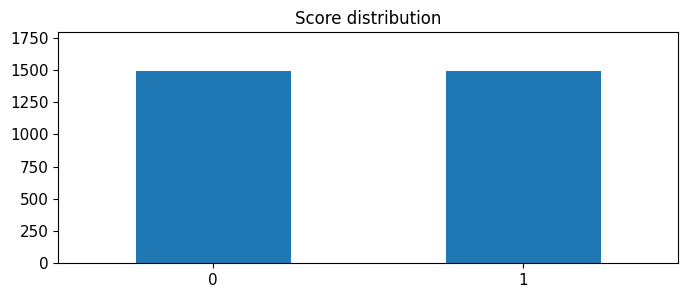

In [321]:
# 原始資料的 "score" 分布長條圖 
upperbound = max(df.score.value_counts() + 300)
df.score.value_counts().plot(kind = 'bar',
                            title = 'Score distribution',
                            ylim = [0, upperbound],        
                             rot = 0, fontsize = 11, figsize = (8,3))

<AxesSubplot: title={'center': 'Sample score distribution'}>

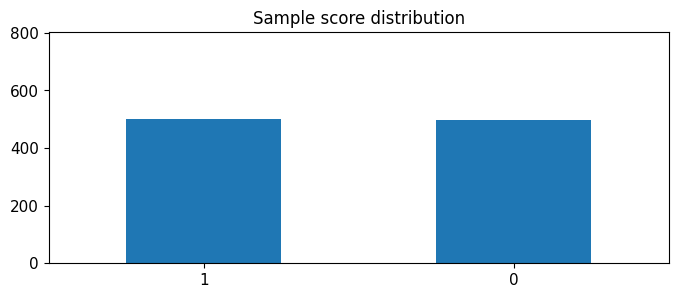

In [329]:
# 採樣資料的 "score" 分布長條圖 
upperbound = max(df_sample.score.value_counts() + 300)
df_sample.score.value_counts().plot(kind = 'bar',
                            title = 'Sample score distribution',
                            ylim = [0, upperbound],        
                             rot = 0, fontsize = 11, figsize = (8,3))

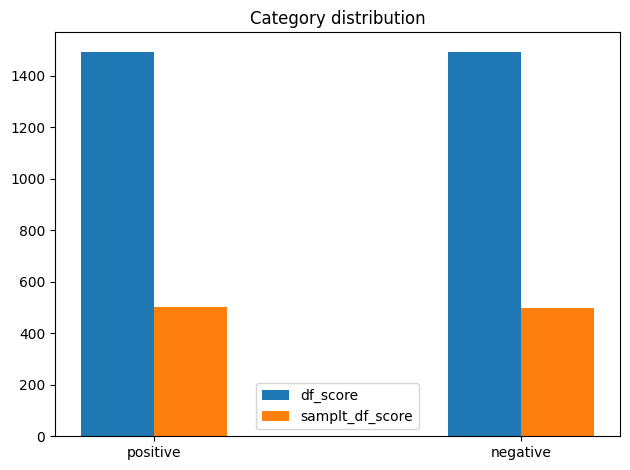

In [327]:
# 使用 side-by-side comparison 長條圖
# 比較 原始資料 & 採樣資料
import numpy as np
labels = ['positive', 'negative']
bar_df = df.score.value_counts().tolist()
bar_sample_df = df_sample.score.value_counts().tolist()

# label locations
x = np.arange(len(labels))
# width of the bars
width = 0.2

fig, ax = plt.subplots()
ax.bar(x - width/2, bar_df, width, label='df_score')
ax.bar(x + width/2, bar_sample_df, width, label='samplt_df_score')

# Add some text for figure title and custom x-axis tick labels, etc.
ax.set_title('Category distribution')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

rects = ax.patches
bar_labels = []
for rect, label in zip(rects, bar_labels):
    height = max(df.score.value_counts() + 300)
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
    )
    
    
fig.tight_layout()
plt.show()

### 5.2 Feature Creation

In [331]:
import nltk
df['unigrams'] = df['sentence'].apply(lambda x: dmh.tokenize_text(x))

In [332]:
df[0:4]['unigrams']

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object

In [333]:
df[0:4]

,sentence,score,website,unigrams
0,So there is no way for me to plug it in here i...,0,amazon,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,amazon,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,amazon,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,amazon,"[Tied, to, charger, for, conversations, lastin..."


In [334]:
list(df[0:1]['unigrams'])

[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.']]

### 5.3 Feature subset selection

In [335]:
from sklearn.feature_extraction.text import CountVectorizer

# 計算 terms 出現的頻率
count_vect = CountVectorizer()
# learn all the vocabularies exist in the document
df_counts = count_vect.fit_transform(df.sentence) 
print(df_counts[0])

  (0, 4161)	1
  (0, 4545)	1
  (0, 2427)	1
  (0, 3043)	1
  (0, 4987)	1
  (0, 1829)	1
  (0, 2809)	1
  (0, 4609)	1
  (0, 3387)	1
  (0, 2432)	1
  (0, 2314)	2
  (0, 2158)	1
  (0, 4531)	1
  (0, 4835)	1
  (0, 4793)	1
  (0, 1982)	1
  (0, 647)	1
  (0, 1013)	1


In [337]:
analyze = count_vect.build_analyzer()
analyze(df.sentence[0])

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

---

In [338]:
df_counts.shape

(2983, 5155)

In [340]:
# 第0-9個 term [0:10]= 的值
count_vect.get_feature_names_out()[0:10]

array(['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17'],
      dtype=object)

In [347]:
# convert sparse array to normal array
# 前5筆資料中，前100個terms出現的次數
df_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [358]:
# 找出上面terms=1次的 term為什麼
rows, terms = df_counts[3, 0:100].nonzero()
for row, term in zip(rows, terms):
    # term = features
    # every row of X_counts has same num of features(col) 
    print('term index: ', term,'term value: ', count_vect.get_feature_names_out()[term : term+1])

term index:  45 term value:  ['45']


---

In [386]:
#畫圖 heatmap
# 因為想要顯示上面看到的 第3筆 documents 中 terms = 1 的資料 = df_counts[3, 45]
# 故顯示 30-50 features的 terms
plot_x = ["term_"+str(i) for i in  count_vect.get_feature_names_out()[30:50]]
# 前 20 筆資料 obtain document index
plot_y = ["doc_"+ str(i) for i in list(df.index)[0:20]]

In [387]:
plot_x

['term_23',
 'term_24',
 'term_25',
 'term_2mp',
 'term_30',
 'term_30s',
 'term_325',
 'term_35',
 'term_350',
 'term_375',
 'term_3o',
 'term_40',
 'term_40min',
 'term_42',
 'term_44',
 'term_45',
 'term_4s',
 'term_4ths',
 'term_50',
 'term_5020']

In [388]:
# df_counts[how many document, how many terms(注意 terms 是顯示第 30-50 個，因此索引值要改)]
plot_z = df_counts[0:20, 30:50].toarray()
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

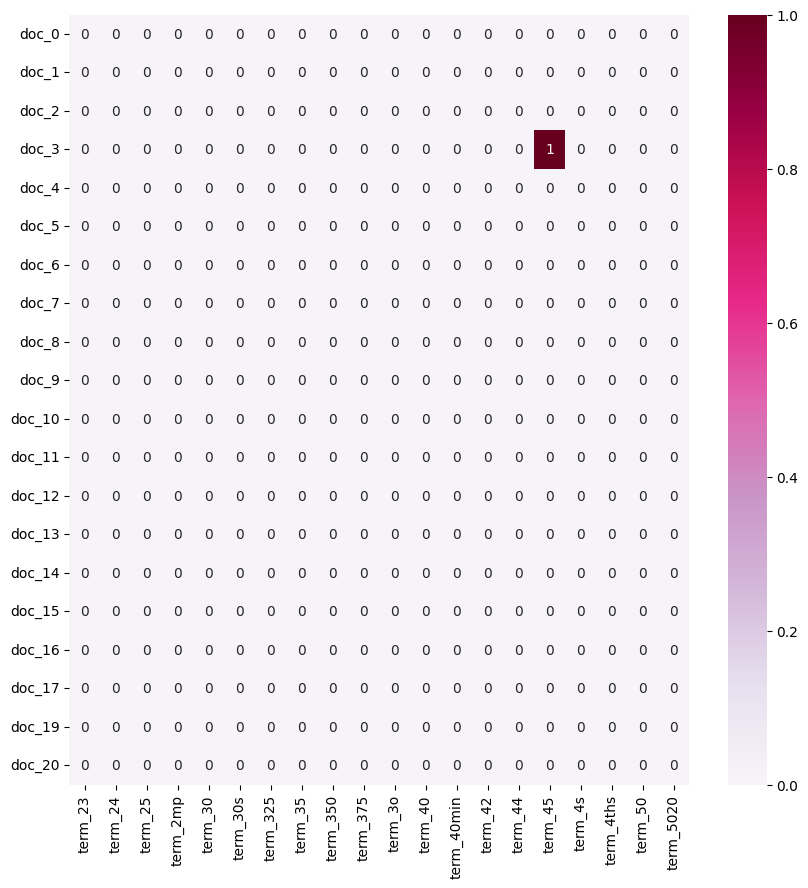

In [389]:
import seaborn as sns
# create a heatmap
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(10, 10))
# annot=True 會顯示數字
# annot=Fasle 不顯示數字
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### 5.4 Dimensionality Reduction

In [ ]:
from sklearn.decomposition import PCA